# COVID-19'S IMPACT ON DIGITAL LEARNING

By :- $Arihant Jha$                 

Date: $August 3,2021$

## OVERVIEW


The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

I intend to analyse 3 different datasets `product_info` , `districts_info` and `engagement_data` in that order and find insighst.

## OBJECTIVE

 **to explore**:
 
 *(1) the state of digital learning in 2020*
 
 *(2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.*

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PRODUCT INFO 
## Understanding the data

The product file products_info.csv includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by our team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

**Each Column:**

$LP ID$:The unique identifier of the product

$URL$:Web Link to the specific product

$Product Name$:Name of the specific product

$Provider/Company Name$:Name of the product provider

$Sector(s)$:Sector of education where the product is used

$Primary Essential Function$:The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: *`LC` = Learning & Curriculum, `CM` = Classroom Management, and `SDO` = School & District Operations. Each of these categories have **multiple sub-categories** with which the products were labeled*


In [ ]:
#importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import glob
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime as dt
init_notebook_mode(connected=True)
%matplotlib inline 

In [ ]:
#reading the product info dataset

product_df = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')


In [ ]:
# .head() shows top 5 datapoints
product_df.head()

In [ ]:
#getting insights
product_df.describe()

In [ ]:
#more insighst
product_df.info()

In [ ]:
#dropping null objects
product_df.dropna(inplace=True)

`Sector(s)` and `Primary Essential Function` are the two columns I will primarily focus on to draw insights about the direction in which the Digital Learning Industry is going.

## Exploratory Data Analysis

Let us find out which sector(s) do most companies deal with **`Sectors`**

In [ ]:
# Grouping products by which Sector(s) they belong to
pie=product_df.groupby('Sector(s)').count()[['LP ID']]
pie['percent'] = (pie['LP ID']/pie['LP ID'].sum() *100)
x=list(pie['percent'])
y=[]
for i in x:
    y.append(str(i))
pie

In [ ]:
# Plotting a pie chart
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))

plt.pie(pie['LP ID'],labels=pie.index,explode=[0,0.4,0,0,0],colors = ("blue","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Sector(s) in which most Digital Learning providers are active in")
plt.legend(title="Sector(s):")

In [ ]:
#plotting a bar graph
plt.figure()
plt.title("Active sectors")
plt.ylabel('Sector(s)')
plt.xlabel('No. of providers')
sns.barplot(x=list(pie['LP ID']),y=pie.index)

In [ ]:
# Since only 2 products do not deal with PreK-12 , let's find thos
product_df[product_df['Sector(s)']=='Higher Ed; Corporate']['Product Name'],product_df[product_df['Sector(s)']=='Corporate']['Product Name']

**Except for two providers all the other providers are concerned about `PreK-12`**

>`Qualtrics` : *Deals with Higher Ed & Corporates*

> `Weebly`   : *Deals only with Corporates*

**`Primary Essential Function` : The main objective of the company/provider**

We first need to understand the following key words.

1. $LC :  Learning & Curriculum$

2. $CM :  Classroom Management & others$

3. $SDO = School & District Operations$





In [ ]:
#Function to classify PEFs into `LC,CM & SDO`
def pef1(data):
    return data.split('-')[0]
#Function to further classify LC,CM & SDO
def pef2(data):
     return data.split('-')[0]+'-'+data.split('-')[1]
#Using the above functions
product_df1 = product_df.sort_values(by='Primary Essential Function',axis=0)
product_df1['PEF-1']=product_df['Primary Essential Function'].apply(pef1)
product_df1['PEF-2']=product_df['Primary Essential Function'].apply(pef2)

In [ ]:
#Grouping by Primary Essential Function
pef=product_df1.groupby('Primary Essential Function',sort=False).count()[['LP ID']]
pef['percent'] = (pef['LP ID']/pef['LP ID'].sum() *100) # finding what percent of products have these Primary Essential Function

In [ ]:
pef.head()

In [ ]:
def pef1(data):
    return data.split('-')[0]
def pef2(data):
     return data.split('-')[0]+'-'+data.split('-')[1]
product_df1 = product_df.sort_values(by='Primary Essential Function',axis=0)
product_df1['PEF-1']=product_df['Primary Essential Function'].apply(pef1)
product_df1['PEF-2']=product_df['Primary Essential Function'].apply(pef2)

In [ ]:
product_df1.head()

In [ ]:
# Similar as that of pef above
pef1=product_df1.groupby('PEF-1',sort=False).count()[['LP ID']]
pef1['percent'] = (pef1['LP ID']/pef1['LP ID'].sum() *100)

In [ ]:
pef1

In [ ]:
# Similar as that of pef above
pef2=product_df1.groupby('PEF-2',sort=False).count()[['LP ID']]
pef2['percent'] = (pef2['LP ID']/pef2['LP ID'].sum() *100)


In [ ]:
plt.figure(figsize=(10,10))
cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]
plt.pie(pef1['LP ID'],labels=pef1.index,explode=[0,0.4,0,0],colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)],autopct='%1.1f%%')
plt.title("Sector(s) in which most Digital Learning providers are active in")
plt.legend(title="Sector(s):",loc='lower right',bbox_to_anchor=(0,0))
#ax.legend(loc='lower right',bbox_to_anchor=(-2,1.5))

In [ ]:
#Plotting a nested pie chart using pef1 and pef2
sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.axis('equal')

plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.rcParams.update({'font.size': 25})

cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]

ax.pie(pef1['LP ID'],colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)], radius=10,explode=[0,0,0,0],labeldistance =1.1)
ax.pie(pef2['LP ID'],labels=pef2.index,colors=[cm(0.2),cm(0.4),cm(0.6),lc(0.5),lc(0.1),lc(0.2),lc(0.3),lc(0.4),lc(0.5),lc(0.6),lc(0.7),lc(0.8),lc(0.9),other(0.5),sdo(0.1),sdo(0.2),sdo(0.3),sdo(0.4),sdo(0.5),sdo(0.6),sdo(0.7),sdo(0.8),sdo(0.9)], autopct='%1.1f%%', radius=8)
                  
plt.title("Primary Essential Functions",fontdict={'fontsize':50})
ax.legend(loc='lower right',bbox_to_anchor=(-2,1.5))
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

## Understanding the pie chart above
The *`pie chart`* above represents $PrimaryEssentialFunctions$

There is an inner pie and an outer pie. The outer pie has 4 major slices and the slices in the inner pie are the subslices of the of major slices with same colour group in the outer pie.

e.g. `CM - Classroom Engagement & Instruction` (shade of blue)
`CM - Teacher Resources` (shade of blue)
`CM - Virtual Classroom` (shade of blue)  are the subslices of `CM` (in blue)

The outer pie is divided into 4 sections (IN COUNTERCLOCKWISE DIRECTION) representing:
1. `CM in blue`   : 9.7% (with 3 subsections in the inner pie)
2. `LC in red`    : 77.3% (with 10 subsections in the inner pie)
3. `All in green` : 4.5% (with 1 subsections in the inner pie)
4. `SDO in brown` : 8.5% (with 9 subsections in the inner pie)

It is very clear that 81.8% new companies offer primarily **Learning and curriculum**.
>77.3 directly related to LC and 4.5 related to all

It is followed by **Classroom management** and **School & district Operation**


PS: Please zoom into the pie chart to see the nuances

In [ ]:
#Plotting a bar graph based on the pie chart above for better understanding
plt.figure()
plt.title("Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(pef1['LP ID']),y=pef1.index)

In [ ]:
#Plotting pef2s
plt.figure(figsize=(10,10))
plt.title("Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(pef2['LP ID']),y=pef2.index)

`LC-Digital Learning Platforms` , `LC-Sites, References and Resources` and `LC- Study tools` are the three biggest focus among EdTech Companies

## Let's Analyse the companies that have more than one product

In [ ]:
#grouping data by company name
more_than1 = product_df1.groupby('Provider/Company Name').count()[['Product Name','Primary Essential Function']]

In [ ]:
#finding companies with more than 1 product
more_than1 = more_than1[more_than1['Product Name']>1]

In [ ]:

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 10})
plt.title("Companies with most products in the Digital Learning Industry")
plt.ylabel('Companies')
plt.xlabel('No. of products')
sns.barplot(x=list(more_than1['Product Name']),y=more_than1.index)


In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(product_df['Product Name'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Words in the product names')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(product_df['Provider/Company Name'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Words in the Company names')

*Apart from words like Learning and Education , which may be common in the names of most Edtech companies, Google LLC is the biggest , most significant organization in this domain*

While most companies have struggled to put forward 5 products , `Google LLC` has surprisingly put up **$27$ products**, establishing itself head and shoulder above the rest.

It would be interesting to analyse the products of `Google` and their domains

## Google LLC Product Analysis


In [ ]:
#dataset containing all the products of google in the EdTech industry
google_df = product_df1[product_df1['Provider/Company Name']=='Google LLC']
google_df.head()

In [ ]:
#analysis of sector in which Google works in
gpie=google_df.groupby('Sector(s)').count()[['LP ID']]
gpie['percent'] = (gpie['LP ID']/gpie['LP ID'].sum() *100)
x=list(gpie['percent'])
y=[]
for i in x:
    y.append(str(i))
gpie


In [ ]:
plt.figure(figsize=(10,10))

plt.pie(gpie['LP ID'],labels=gpie.index,explode=[0,0,0.4],colors = ("beige","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Sector(s) in which Google is active in")
plt.legend(title="Sector(s):")

In [ ]:
plt.figure()
plt.title("Active sectors")
plt.ylabel('Sector(s)')
plt.xlabel('No. of providers')
sns.barplot(x=list(gpie['LP ID']),y=gpie.index)

In [ ]:
gpef1=google_df.groupby('PEF-1',sort=False).count()[['LP ID']]
gpef1['percent'] = (gpef1['LP ID']/gpef1['LP ID'].sum() *100)
gpef1

In [ ]:
gpef2=google_df.groupby('PEF-2',sort=False).count()[['LP ID']]
gpef2['percent'] = (gpef2['LP ID']/gpef2['LP ID'].sum() *100)

In [ ]:
plt.figure(figsize=(10,10))
cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]
plt.pie(gpef1['LP ID'],labels=gpef1.index,explode=[0,0,0,0],colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)],autopct='%1.1f%%')
plt.title("Primary Essential Functions of Google Products")
plt.legend(title="Sector(s):",loc='lower right',bbox_to_anchor=(0,0))

In [ ]:
sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.axis('equal')

plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.rcParams.update({'font.size': 35})

cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]

ax.pie(gpef1['LP ID'],labels=gpef1.index,colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)], radius=10,explode=[0,0,0,0])
ax.pie(gpef2['LP ID'],labels=gpef2.index,colors=[cm(0.2),cm(0.4),lc(0.1),lc(0.2),lc(0.3),lc(0.4),other(0.5),sdo(0.3),sdo(0.4)], autopct='%1.1f%%', radius=8)
                  
plt.title("Google",fontdict={'fontsize':50})
ax.legend(loc='lower right',bbox_to_anchor=(-2,1.5))
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

In [ ]:
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(10,10))
plt.title("Google's Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(gpef2['LP ID']),y=gpef2.index)

In [ ]:
plt.figure(figsize=(15,10))
pef1['G percent'] = gpef1['percent']
plt.plot(pef1["percent"],label='All companies',marker='.')
plt.plot(gpef1["percent"],label='Google',marker='*')
plt.title("Comparison of Google with other Edtech Companies")
plt.xlabel('Primary Essential Functions')
plt.ylabel('Percentage of company in this domain')
plt.legend()

**Strategy of Google is different from the rest of the companies in this domain.
As we can see in the plot above.**

Here we finish the analysis of our first dataset.

## $Findings$:

1. Each sector had a fair share of products in it's domain , with 48.3 percent primarily focusing on PreK_12.
2. It seems likely that every product built it's way up the ladder, i.e. it was built for PreK-12 ,then used for Higher Education and then for corporate.
3. There are only 2 products that do not focus on PreK-12.
4. The pie chart makes it clear that mostly all products(77.3%) focused on learning and curriculum building.
5. The subsections can be easily observed in the pie chart above.
6. An interesting finding was that even though other companies had no more than 5 products in this domain yet , Google took a giant leap and managed to launch 27 different products.
7. On further interrogation of the dataset, another interesting thing was observed, although Google still has majority (48.1%) of it's product focusing on learning, the company showed big divergence from the general trend in the other two domains.
>*  22.2 percent of Google products focused on Classroom Management , compared to 9.7% in general.
>* 6 out of 34 products in the Classroom Management domain are from Google


Let us explore the other two datasets and finally explore if we can *combine the findings of all 3 datasets.*


# DISTRICT INFORMATION DATA

## Understanding the data

The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.

**district_id** : The unique identifier of the school district

**state** : The state where the district resides in

**locale** : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.

**pct_black/hispanic** : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

**pct_free/reduced** : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

**countyconnectionsratio** : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.

**pptotalraw** : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [ ]:
district_df = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
                          
                          

In [ ]:
district_df.head()

In [ ]:
district_df.info()

In [ ]:
district_df.shape

In [ ]:
(district_df['pp_total_raw'][0])

In [ ]:
district_df.locale.unique()

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(district_df['state'].dropna().astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
states = district_df.groupby(by ='state').count()[['district_id']]

Since we need the state shortforms like AZ for arizona, we need to make some changes in the dataset.

**We need to use additional Data**

In [ ]:
#abbreviations of all the US States
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
codes = []
for i in states.index:
    codes.append(us_state_abbrev[i])
print(codes)

In [ ]:
data = dict(
        type = 'choropleth',
        colorscale = 'portland',
        locations = codes,
        locationmode = 'USA-states',
        z = list(states['district_id']),
        text = states.index,
        colorbar = {'title':'States'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'States with most districts mentioned',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
plt.figure(figsize=(10,10))
plt.title("States with most Districts Mentioned")
plt.ylabel('States')
plt.xlabel('No. of districts mentioned')
sns.barplot(x=list(states['district_id']),y=states.index)

## Cleaning the data
We know that the district dataset is filled with a lot of null values.
Let's try to visualize it.

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(district_df.isna(),cbar=False)

It is clear that there a lot of data points that are just empty , with no information what so ever. It would be best if we first drop those data points.

In [ ]:
district_df.dropna(subset=['state'],inplace=True)
district_df.sample(5)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(district_df.isna(),cbar=False,)

## Trying to visualize the locale mentioned 

In [ ]:
locale = district_df.groupby('locale').count()['district_id']
list(locale)

In [ ]:
plt.figure(figsize=(10,10))

plt.pie(locale,labels=locale.index,explode=[0,0,0.3,0],colors = ("blue","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Localities of the districts mentioned")
plt.legend(title="Locality:")

In [ ]:
plt.figure(figsize=(16,7))
plt.title("Localities of the districts mentioned")
plt.ylabel('Sector(s)')
plt.xlabel('No. of Districts')
sns.barplot(x=list(locale),y=locale.index)

It can clearly be observed that most districts are Subarban.

In [ ]:
district_df['state'].nunique()

### It is my observation that GDP per capita would have a correlation with the engagement in Engagement Dataset, hence I will add it by state to district_df and then use it later on 

In [ ]:
#importing additional data
gdp = pd.read_csv('../input/gdp-per-capita-in-us-states/bea-gdp-by-state.csv')[1:]
gdp.head()

**Let's plot the Gdp per capita values on the map of USA**

In [ ]:
us_state_abbrev

In [ ]:
codes = []
for i in gdp.Area:
    if i =='District of Columbia':
        i='District Of Columbia'
    if i == 'New England':
        break
        
    else:
        codes.append(us_state_abbrev[i])
print(codes,len(codes))

In [ ]:
len(us_state_abbrev),gdp.shape

In [ ]:
data = dict(
        type = 'choropleth',
        colorscale = 'viridis',
        locations = codes,
        locationmode = 'USA-states',
        z = list(gdp['2017']),
        text = gdp.Area,
        colorbar = {'title':'GDP per capita'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'GDP per capita of US States',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(x=gdp['2017'],y=gdp.Area)

Plotting a similar map of USA but by dropping District of Columbia since it is an outlier

In [ ]:
codes1 = []
gdp1 = gdp[gdp['Area']!='District of Columbia']
for i in gdp1.Area:
    if i =='District of Columbia':
        i='District Of Columbia'
    if i == 'New England': #Because we don't need to consider data below it
        break
        
    else:
        codes1.append(us_state_abbrev[i])
#print(codes,len(codes))
data = dict(
        type = 'choropleth',
        colorscale = 'viridis',
        locations = codes1,
        locationmode = 'USA-states',
        z = list(gdp1['2017']),
        text = gdp1.Area,
        colorbar = {'title':'GDP per capita'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'GDP per capita of US States',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

### Merging this data with the districts dataframe

In [ ]:
# A function that finds gdp of the state
def gdp_finder(data):
    
    x= list(gdp[gdp['Area']==data]['2017'])
    return x

In [ ]:
gdps = []
for i in district_df['state']:
    if i =='District Of Columbia':
        i='District of Columbia'
    gdps.append(gdp_finder(i)[0])
    if gdp_finder(i)==[]:
        print(i)

In [ ]:
district_df['2017 GDP per capita of state']=gdps

## CLEANING THE DISTRICT DATA : PART 2

1. It is very strange that every data point in the county_connections_ratio column has the same value , we must add the real values there from *additional datasets*

In [ ]:
district_df.head()

In [ ]:
# Downloaded df from https://www.fcc.gov/form-477-county-data-internet-access-services
cc_df = pd.read_csv('../input/cconnection/county_connections_dec_2018 (1).csv')
cc_df.head(300)


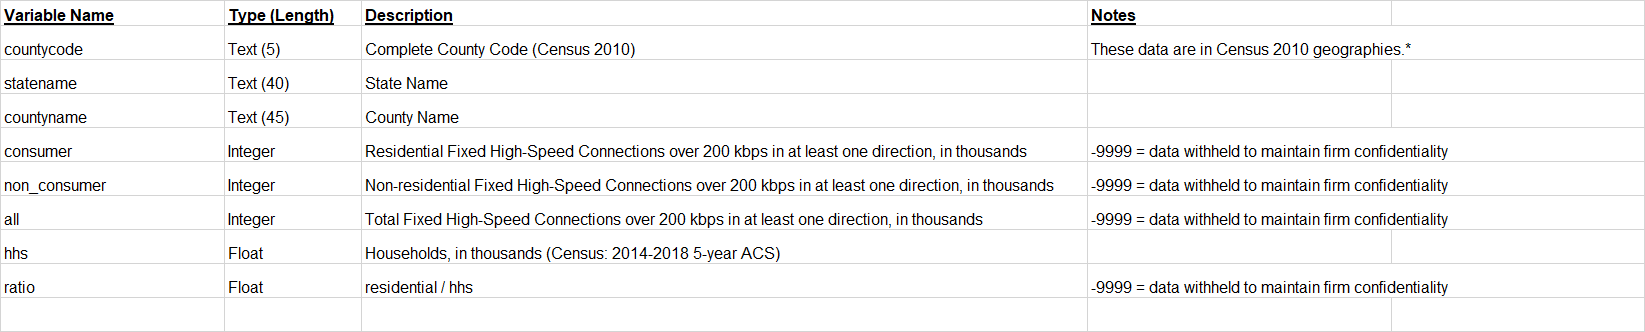!

In [ ]:
confidential = cc_df[cc_df['ratio']==-9999]
confidential.groupby('statename').sum()['ratio']

In [ ]:
ratio_df=cc_df.groupby('statename').sum()[['ratio']]
ratio_df['Confidential Sum']=confidential.groupby('statename').sum()['ratio']

In [ ]:
ratio_df['Count']=cc_df.groupby('statename').count()[['ratio']]
ratio_df = ratio_df.fillna(0)
ratio_df['Mean Ratio']=(ratio_df['ratio']-ratio_df['Confidential Sum'])/ratio_df['Count']
ratio_df.drop(['ratio','Confidential Sum','Count'],axis=1,inplace=True)

In [ ]:
ratio_df

In [ ]:
codes1 = [] 
for i in ratio_df.index:
    if i =='District of Columbia':
        i='District Of Columbia'
    if i =='Northern Mariana Isl':
        i='Northern Mariana Islands'
    if i == 'New England': #Because we don't need to consider data below it
        break
        
    else:
        codes1.append(us_state_abbrev[i])
#print(codes,len(codes))
data = dict(
        type = 'choropleth',
        colorscale = 'viridis',
        locations = codes1,
        locationmode = 'USA-states',
        z = list(ratio_df['Mean Ratio']),
        text = ratio_df.index,
        colorbar = {'title':'County connectivity'},
      )

layout = dict(title= 'County Connectivity of US states',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
x= list(district_df.state)
cc = []
for i in x:
    if i =='District Of Columbia':
        i='District of Columbia'
    if i =='Northern Mariana Isl':
        i='Northern Mariana Islands'
    cc.append(list(ratio_df[ratio_df.index==i]['Mean Ratio'])[0])
    if len(list(ratio_df[ratio_df.index==i]['Mean Ratio']))<1:
        print(i)

district_df['County Connections Ratio']=cc

## HYPOTHESIS : COUNTY CONNECTION RATIO MUST BE DIRECTLY CORRELATED WITH GDP PER CAPITA

**As standard of living increases with increase in GDP per capita**

In [ ]:

sns.jointplot(x='2017 GDP per capita of state',y='County Connections Ratio',data=district_df)
#plt.title('GDP per capita vs County Connections Ratio'

Since District of Columbia is a clear outlier here , let's drop it to further test the hypothesis

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x='2017 GDP per capita of state',y='County Connections Ratio',data=district_df[district_df['state']!='District Of Columbia'])


The hypothesis seems to fail as the both parameters in the graph above do not show an direct correlation

In [ ]:
district_df.sample(10)

In [ ]:
district_df.corr()

No great correlation between GDP per capita and county connection ratio , only 0.096

In [ ]:
plt.figure(figsize=(16,7))
sns.countplot(x='pct_black/hispanic',data=district_df,hue='locale')
plt.title('pct_black/hispanic by the locale')

# ENGAGEMENT DATAFRAME

**time:** date in "YYYY-MM-DD"

**lp_id:** The unique identifier of the product

**pct_access:** Percentage of students in the district have at least one page-load event of a given product and on a given day

**engagement_index:** Total page-load events per one thousand students of a given product and on a given day

In [ ]:
data_path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
csv_files = glob.glob(data_path + "/*.csv")

dfs = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    dfs.append(df)
    
engagement_df = pd.concat(dfs)
engagement_df = engagement_df.reset_index(drop=True)
engagement_df.head()

In [ ]:
product_df.head()

In [ ]:
engagement_df.info()

In [ ]:
engagement_df.describe()

In [ ]:
sns.heatmap(engagement_df.isna())

In [ ]:
engagement_df.dropna(inplace = True)

In [ ]:
#sns.heatmap(engagement_df.isna())

In [ ]:
def month(data):
    return int(data.split('-')[1])
def datetime(data):
    d_t = dt(int(data.split('-')[0]),int(data.split('-')[1]),int(data.split('-')[2]))
    return d_t
    
engagement_df['Month']=engagement_df['time'].apply(month)
engagement_df['time']=engagement_df['time'].apply(datetime)

In [ ]:
engagement_df.head()

In [ ]:
index_df = engagement_df.groupby('Month')[['engagement_index','pct_access']].mean()

In [ ]:
engagement_df.describe()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(index_df['engagement_index'])
plt.title('Engagement Index throughout 2020')
plt.ylabel('Engagement index')
plt.xlabel('Months')

In [ ]:
plt.figure(figsize=(16,7))

plt.title('Pct access throughout 2020')
plt.ylabel('Pct access')
plt.xlabel('Months')
plt.plot(index_df['pct_access'])

We can see a huge dip in engagement and pct_index , that maybe due to summer vacations in USA 

In [ ]:
index_df

## Let's see which product was most used in each month

In [ ]:
engagement_df = engagement_df.merge(product_df1,left_on='lp_id',right_on='LP ID')

**January**

In [ ]:
jan_df = engagement_df[engagement_df['Month']==1].groupby('Product Name')[['engagement_index','pct_access']].mean()

In [ ]:
plt.figure(figsize=(16,7))
plt.bar(height = jan_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = jan_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in January')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(jan_df.index.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in Jan')

**February**

In [ ]:
feb_df = engagement_df[engagement_df['Month']==2].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = feb_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = feb_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in February')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(feb_df.index.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in Feb')

**March**

In [ ]:
mar_df = engagement_df[engagement_df['Month']==3].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = mar_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = mar_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in March')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(mar_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in March')

**April**

In [ ]:
apr_df = engagement_df[engagement_df['Month']==4].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = apr_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = apr_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in April')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(apr_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in April')

**May**

In [ ]:
may_df = engagement_df[engagement_df['Month']==5].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = may_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = may_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in May')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(may_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in May')

### **June**

In [ ]:
jun_df = engagement_df[engagement_df['Month']==6].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = jun_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = jun_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in June')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(jun_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in June')

### **July**

In [ ]:
jul_df = engagement_df[engagement_df['Month']==7].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = jul_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = jul_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in July')

We can see that because of vacation youtube, instagram and hulu are the top used platforms.


In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(jul_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in July')

### **August**

In [ ]:
aug_df = engagement_df[engagement_df['Month']==8].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = aug_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = aug_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in August')

We can finally see Zoom in top10

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(aug_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in August')

### **September**

In [ ]:
sep_df = engagement_df[engagement_df['Month']==9].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = sep_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = sep_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in September')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(sep_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in September')

### **October**

In [ ]:
oct_df = engagement_df[engagement_df['Month']==10].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = oct_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = oct_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in October')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(oct_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in October')

### **November**

In [ ]:
nov_df = engagement_df[engagement_df['Month']==11].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = nov_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = nov_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in November')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(nov_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in November')

### **December**

In [ ]:
dec_df = engagement_df[engagement_df['Month']==12].groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = dec_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = dec_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in December')

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(dec_df.index.astype(str)))
plt.figure(figsize=(15, 10))

plt.imshow(cloud)
plt.axis('off')
plt.title('Most used Digital Learning platforms in December')

### **Throughout the year**

In [ ]:
yr_df = engagement_df.groupby('Product Name')[['engagement_index','pct_access']].mean()
plt.figure(figsize=(16,7))
plt.bar(height = yr_df.sort_values(by='engagement_index').tail(10)['engagement_index'],x = yr_df.sort_values(by='engagement_index').tail(10).index)
plt.xticks(rotation = 90)
plt.title('Most used Edtech platforms in 2020')

## LET'S COMPARE ZOOM AND MEET

`Zoom` and `meet` are two of the most used platforms as online classes

In [ ]:
zoom_df=engagement_df[engagement_df['Product Name']=='Zoom'].groupby('Month')[['engagement_index','pct_access']].mean()

In [ ]:
meet_df=engagement_df[engagement_df['Product Name']=='Meet'].groupby('Month')[['engagement_index','pct_access']].mean()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(meet_df['engagement_index'],label='meet')
plt.plot(zoom_df['engagement_index'],label='zoom')
plt.title('ENGAGEMENT INDEX : MEET VS ZOOM')
plt.xlabel('MONTHS')
plt.legend()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(meet_df['pct_access'],label='meet')
plt.plot(zoom_df['pct_access'],label='zoom')
plt.title('PCT ACCESS : MEET VS ZOOM')
plt.xlabel('MONTHS')
plt.legend()

## Youtube : Performance throughout the year

In [ ]:
yt_df=engagement_df[engagement_df['Product Name']=='YouTube'].groupby('Month')[['engagement_index','pct_access']].mean()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(yt_df['pct_access'],label='Youtube')

plt.title('PCT ACCESS : YOUTUBE')
plt.xlabel('MONTHS')
plt.legend()

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(yt_df['engagement_index'],label='Youtube')

plt.title('ENGAGEMENT INDEX : YOUTUBE')
plt.xlabel('MONTHS')
plt.legend()

In [ ]:
mp_df=engagement_df.groupby(['Month','PEF-1'])[['pct_access','engagement_index']].mean()

In [ ]:
mp_df['PEF']=['CM','LC','LC/CM/SDO','SDO']*12

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x=[str(x) for x in mp_df.index],y=mp_df['engagement_index'],hue=mp_df['PEF'])
plt.xticks(rotation=90)

In [ ]:
cm=mp_df[mp_df['PEF']=='CM']
other=mp_df[mp_df['PEF']=='LC/CM/SDO']
lc = mp_df[mp_df['PEF']=='LC']
sdo=mp_df[mp_df['PEF']=='SDO']


In [ ]:
plt.figure(figsize=(16,7))
plt.plot(list(cm['engagement_index']),label='CM')
plt.plot(list(lc['engagement_index']),label='LC')
plt.plot(list(sdo['engagement_index']),label='SDO')
plt.plot(list(other['engagement_index']),label='All')
plt.title('ENGAGEMENT INDICES')
plt.xlabel('MONTHS')
plt.legend()

# THANKS FOR GOING THROUGH MY NOTEBOOK!!!

### This is still a work in progress.
### Do $upvote$ if you like my work
### Please feel free to share your suggestions in $comments$, it will be very helpful